In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/Monthly_Unemployment_1991-2020.csv')

In [ ]:
df.tail()

,ds,y
339,31-03-2020,8.75
340,30-04-2020,23.52
341,31-05-2020,23.48
342,30-06-2020,10.99
343,31-07-2020,7.43


In [ ]:
df['ds']=pd.to_datetime(df['ds'])

In [ ]:
df.set_index('ds',inplace=True)

In [ ]:
df.head()

,y
ds,
1991-12-31,5.450000
1992-01-31,5.454167
1992-02-29,5.458333
1992-03-31,5.462500
1992-04-30,5.466667


Visualize the data

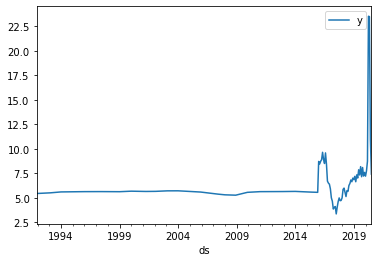

In [ ]:
df.plot()
plt.savefig("filename.pdf")

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result=adfuller(df['y'])

In [ ]:
test_result

(1.61407510237003,
 0.9978991940624297,
 13,
 330,
 {'1%': -3.4503224123605194,
  '10%': -2.571457612488522,
  '5%': -2.870338478726661},
 820.0793583093201)

In [ ]:
#Ho: It is not stationary
#H1: It is stationary

def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['y'])

ADF Test Statistic : 1.61407510237003
p-value : 0.9978991940624297
#Lags Used : 13
Number of Observations Used : 330
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Differencing to make data stationary for arima

In [ ]:
df['y First Difference'] = df['y'] - df['y'].shift(1)

In [ ]:
df['y'].shift(1)

ds
1991-12-31          NaN
1992-01-31     5.450000
1992-02-29     5.454167
1992-03-31     5.458333
1992-04-30     5.462500
                ...    
2020-03-31     7.760000
2020-04-30     8.750000
2020-05-31    23.520000
2020-06-30    23.480000
2020-07-31    10.990000
Name: y, Length: 344, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['y']-df['y'].shift(12)

In [ ]:
df.head(15)

,y,y First Difference,Seasonal First Difference
ds,,,
1991-12-31,5.450000,NaN,NaN
1992-01-31,5.454167,0.004167,NaN
1992-02-29,5.458333,0.004167,NaN
1992-03-31,5.462500,0.004167,NaN
1992-04-30,5.466667,0.004167,NaN
1992-05-31,5.470833,0.004167,NaN
1992-06-30,5.475000,0.004167,NaN
1992-07-31,5.479167,0.004167,NaN
1992-08-31,5.483333,0.004167,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -0.4406437689508013
p-value : 0.903088368462337
#Lags Used : 15
Number of Observations Used : 316
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df['Seasonal second Difference'] = df['Seasonal First Difference'] - df['Seasonal First Difference'].shift(12)

In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal second Difference'].dropna())

ADF Test Statistic : -4.078858573963981
p-value : 0.0010494597514596376
#Lags Used : 17
Number of Observations Used : 302
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


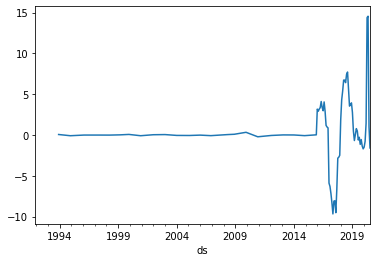

In [ ]:
df['Seasonal second Difference'].plot()
plt.savefig("filename1.pdf")

Auto Regressive Model

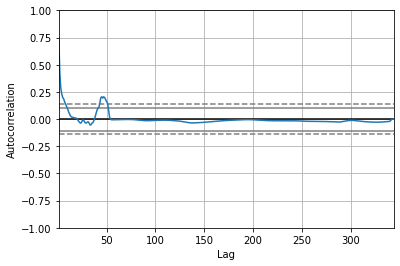

<Figure size 432x288 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['y'])
plt.show()
plt.savefig("filename2.pdf")

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['y'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  343
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -502.805
Method:                       css-mle   S.D. of innovations              1.048
Date:                Sun, 07 Mar 2021   AIC                           1013.611
Time:                        12:21:35   BIC                           1028.962
Sample:                    01-31-1992   HQIC                          1019.725
                         - 07-31-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.070      0.089      0.929      -0.131       0.143
ar.L1.D.y     -0.3027      0.090     -3.378      0.001      -0.478      -0.127
ma.L1.D.y      0.6118      0.066      9.320      0.000       0.483       0.741
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3040           +0.0000j            3.3040            0.5000
MA.1           -1.6344           +0.0000j            1.6344            0.5000
-----------------------------------------------------------------------------
"""

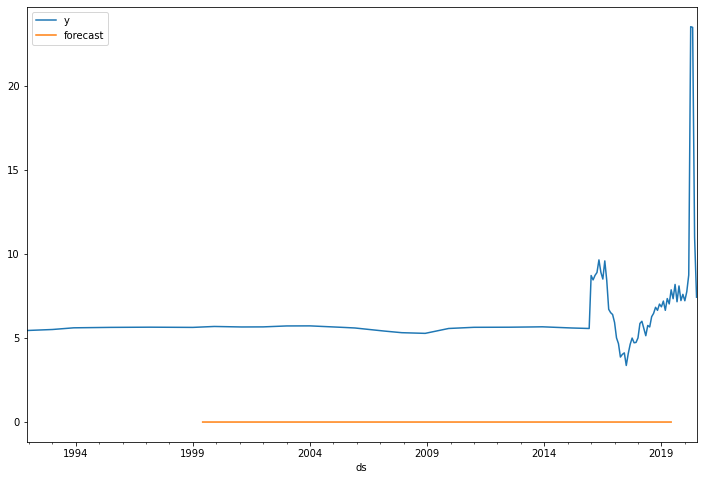

In [ ]:
df['forecast']=model_fit.predict(start=90,end=330,dynamic=True)
df[['y','forecast']].plot(figsize=(12,8))
plt.savefig("filename3.pdf")

In [ ]:
df['forecast'].head()

ds
1991-12-31   NaN
1992-01-31   NaN
1992-02-29   NaN
1992-03-31   NaN
1992-04-30   NaN
Name: forecast, dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['y'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


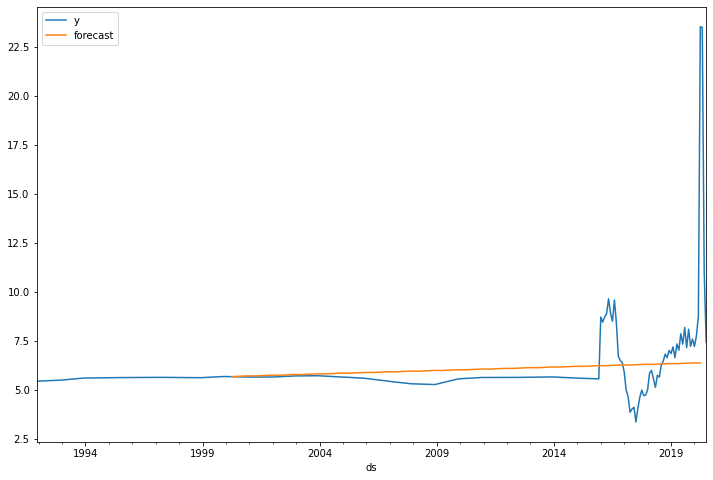

In [ ]:
df['forecast']=results.predict(start=100,end=340,dynamic=True)
df[['y','forecast']].plot(figsize=(12,8))
plt.savefig("filename4.pdf")

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]


In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,y,y First Difference,Seasonal First Difference,Seasonal second Difference,forecast
2022-02-28,NaN,NaN,NaN,NaN,NaN
2022-03-31,NaN,NaN,NaN,NaN,NaN
2022-04-30,NaN,NaN,NaN,NaN,NaN
2022-05-31,NaN,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

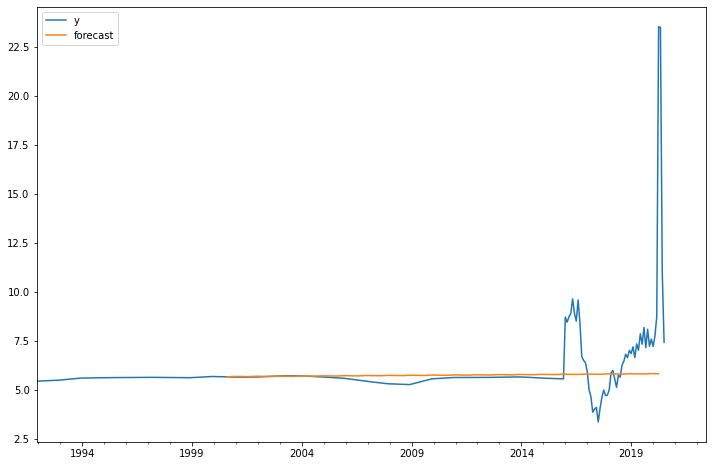

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 340, dynamic= True)  
future_df[['y', 'forecast']].plot(figsize=(12, 8))
plt.savefig("filename5.pdf")